In [ ]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns


file_url = 'https://drive.google.com/uc?id=10oyIT1KPdwUqeU9-2LX0xE5-ZytNn9su'


gdown.download(file_url, 'FIFA_players.csv', quiet=False)


df = pd.read_csv('FIFA_players.csv')

df.head()

Downloading...
From: https://drive.google.com/uc?id=10oyIT1KPdwUqeU9-2LX0xE5-ZytNn9su
To: /content/FIFA_players.csv
100%|██████████| 9.14M/9.14M [00:00<00:00, 128MB/s]


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
# 1. Which country has the most number of players?
country_counts = df['Nationality'].value_counts()
top_country = country_counts.idxmax()
print(f"Country with the most number of players: {top_country}")

Country with the most number of players: England


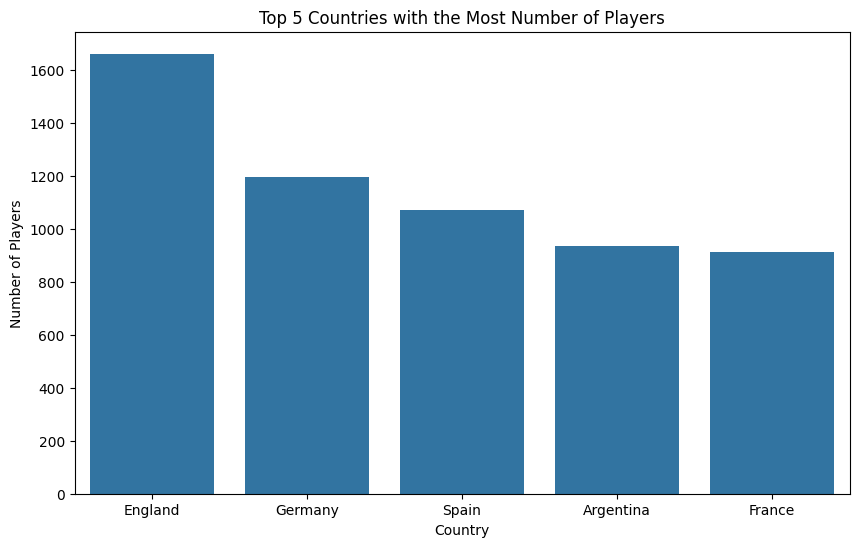

In [ ]:
# 2. Plot a bar chart of the top 5 countries with the most number of players.
top_5_countries = country_counts.head(5)
plt.figure(figsize=(10, 6))
# Plot without using 'palette' to avoid the deprecation warning
sns.barplot(x=top_5_countries.index, y=top_5_countries.values)
plt.title('Top 5 Countries with the Most Number of Players')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.show()

In [ ]:
# 3. Which player has the highest salary?
df['Wage'] = df['Wage'].str.replace('€', '').str.replace('K', '').astype(float) * 1000  # Convert wage to numeric in EUR
highest_salary_player = df.loc[df['Wage'].idxmax()]
print(f"Player with the highest salary: {highest_salary_player['Name']} with a salary of €{highest_salary_player['Wage']}")


Player with the highest salary: L. Messi with a salary of €565000.0


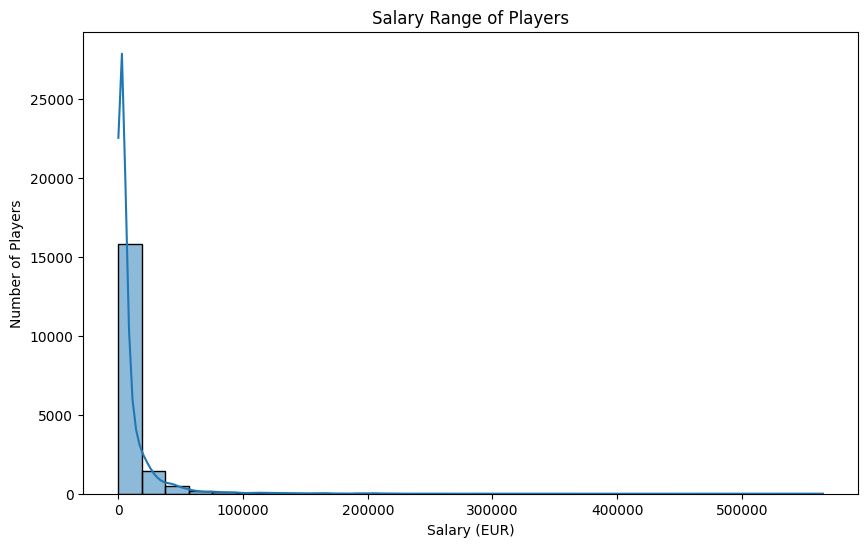

In [ ]:
# 4. Plot a histogram to get the salary range of the players.
plt.figure(figsize=(10, 6))
sns.histplot(df['Wage'], bins=30, kde=True)
plt.title('Salary Range of Players')
plt.xlabel('Salary (EUR)')
plt.ylabel('Number of Players')
plt.show()

In [ ]:
# Function to convert height in the format "5'7" to total inches
def height_to_inches(height_str):
    try:
        feet, inches = height_str.split("'")
        inches = inches.replace('"', '').strip()  # Clean the inches part
        return int(feet) * 12 + int(inches)  # Convert feet to inches and add inches
    except Exception:
        return None

# Use the function to find the index of the tallest player
tallest_player_index = df['Height'].apply(height_to_inches).idxmax()

# Get the details of the tallest player
tallest_player = df.loc[tallest_player_index]

print(f"The tallest player is: {tallest_player['Name']} with a height of {tallest_player['Height']}")




The tallest player is: T. Holý with a height of 6'9


In [ ]:
# 6. Which club has the most number of players?
club_counts = df['Club'].value_counts()
top_club = club_counts.idxmax()
print(f"Club with the most number of players: {top_club}")

Club with the most number of players: FC Barcelona


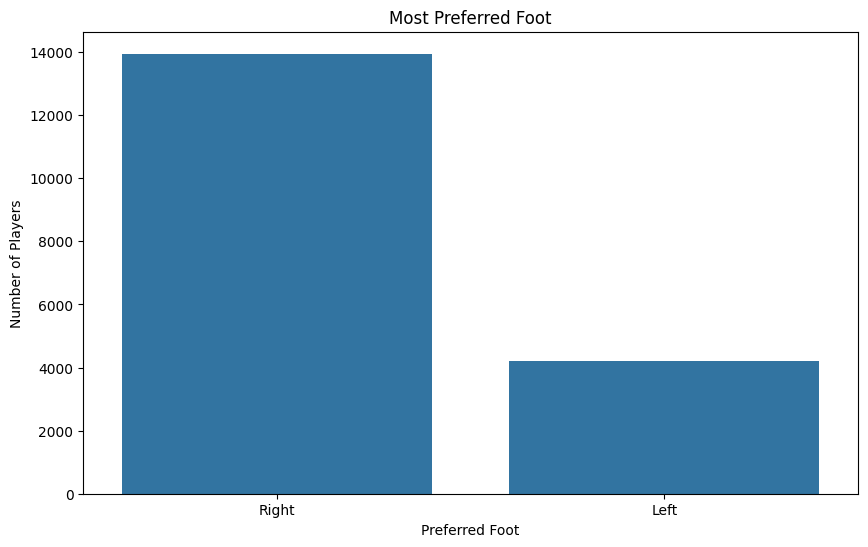

In [ ]:
# 7. Which foot is most preferred by the players? Draw a bar chart for preferred foot.
preferred_foot_counts = df['Preferred Foot'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=preferred_foot_counts.index, y=preferred_foot_counts.values)
plt.title('Most Preferred Foot')
plt.xlabel('Preferred Foot')
plt.ylabel('Number of Players')
plt.show()